In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import pywt
from pywt import wavedec

In [2]:
file = pd.read_csv('PV.csv',sep =';',decimal=',')
file.columns
file['DATE'] = pd.to_datetime(file["DATE"])

In [3]:
d = file.set_index('DATE')
a = d.pivot(columns='INV',values=['Prod','Pred_self','Pred_neighbour','IRRADIANCE'])

In [4]:
b = a.swaplevel(axis=1).sort_index(by="INV", axis=1)
b.head()


/home/karine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


INV                 PVT01.INV01                                        \
                           Prod IRRADIANCE   Pred_self Pred_neighbour   
DATE                                                                    
2018-06-07 16:50:00      695.58      919.0  690.317974     693.949980   
2018-06-08 07:00:00       25.42       35.7   44.702792      25.197383   
2018-06-08 07:10:00       22.74       41.6   49.015177      22.440701   
2018-06-08 07:20:00       28.04       67.8   68.165090      28.381391   
2018-06-08 07:30:00       39.20       91.7   85.633903      40.430942   

INV                 PVT01.INV02                                        \
                           Prod IRRADIANCE Pred_neighbour   Pred_self   
DATE                                                                    
2018-06-07 16:50:00      700.76      919.0     699.117278  695.636722   
2018-06-08 07:00:00       26.06       35.7      25.676702   45.321540   
2018-06-08 07:10:00       22.50       41.6      23.666146   49.665318   
2018-06-08 07:20:00       27.16       67.8      30.289965   68.954640   
2018-06-08 07:30:00       37.90       91.7      42.864158   86.550624   

INV                 PVT02.INV01                   ...        PVT03.INV02  \
                           Prod Pred_neighbour    ...     Pred_neighbour   
DATE                                              ...                      
2018-06-07 16:50:00      699.75     703.557104    ...         693.344689   
2018-06-08 07:00:00       28.01      28.975557    ...          25.703295   
2018-06-08 07:10:00       27.66      27.303469    ...          24.474918   
2018-06-08 07:20:00       37.20      35.258871    ...          33.084980   
2018-06-08 07:30:00       52.75      49.044720    ...          48.519347   

INV                             PVT04.INV01                                    \
                      Pred_self   Pred_self IRRADIANCE    Prod Pred_neighbour   
DATE                                                                            
2018-06-07 16:50:00  690.285465  700.062286      919.0  698.44     702.896448   
2018-06-08 07:00:00   45.353103   48.517991       35.7   26.88      26.624994   
2018-06-08 07:10:00   49.660927   52.869979       41.6   24.30      27.513785   
2018-06-08 07:20:00   68.790586   72.195758       67.8   32.45      38.389392   
2018-06-08 07:30:00   86.240924   89.824999       91.7   45.85      54.922159   

INV                 PVT04.INV02                                    
                      Pred_self    Prod Pred_neighbour IRRADIANCE  
DATE                                                               
2018-06-07 16:50:00  694.526840  699.30     693.766625      919.0  
2018-06-08 07:00:00   47.114699   25.40      25.639479       35.7  
2018-06-08 07:10:00   51.439086   25.68      25.082466       41.6  
2018-06-08 07:20:00   70.642299   35.65      35.206111       67.8  
2018-06-08 07:30:00   88.159734   51.19      50.823989       91.7  

[5 rows x 32 columns]

In [61]:
#A faire fonction moving average +plot

# Exploration data

In [5]:
h = b.loc[:,'PVT01.INV02']
h.head()
h.describe()

,Prod,IRRADIANCE,Pred_neighbour,Pred_self
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,363.416327,479.605421,363.539933,372.139648
std,244.397016,329.645665,242.709155,242.696231
min,0.000000,0.000000,-0.843619,19.037998
25%,118.772500,161.175000,121.865605,137.700457
50%,374.700000,474.900000,376.614922,368.675358
75%,603.767500,782.625000,599.672278,595.232858
max,704.190000,1192.100000,704.768526,896.702132


In [6]:
h.corr()

,Prod,IRRADIANCE,Pred_neighbour,Pred_self
Prod,1.000000,0.987720,0.999098,0.987720
IRRADIANCE,0.987720,1.000000,0.990524,1.000000
Pred_neighbour,0.999098,0.990524,1.000000,0.990524
Pred_self,0.987720,1.000000,0.990524,1.000000


# Add columns residual on the data

In [35]:
h['residu_self'] = h['Prod'] -h['Pred_self']
h['residu_n'] = h['Prod'] -h['Pred_neighbour']
h

/home/karine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/karine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Prod,IRRADIANCE,Pred_neighbour,Pred_self,residu_self,residu_n
DATE,,,,,,
2018-06-07 16:50:00,700.76,919.0,699.117278,695.636722,5.123278,1.642722
2018-06-08 07:00:00,26.06,35.7,25.676702,45.321540,-19.261540,0.383298
2018-06-08 07:10:00,22.50,41.6,23.666146,49.665318,-27.165318,-1.166146
2018-06-08 07:20:00,27.16,67.8,30.289965,68.954640,-41.794640,-3.129965
2018-06-08 07:30:00,37.90,91.7,42.864158,86.550624,-48.650624,-4.964158
2018-06-08 07:40:00,53.81,112.1,59.764801,101.569791,-47.759791,-5.954801
2018-06-08 07:50:00,74.84,145.9,80.942382,126.454488,-51.614488,-6.102382
2018-06-08 08:00:00,100.10,180.2,105.678634,151.707302,-51.607302,-5.578634
2018-06-08 08:10:00,127.13,197.2,132.336538,164.223274,-37.093274,-5.206538


# Resampling 

In [21]:
h.resample('10T')
hresample = hresample.resample('10T').bfill()
hresample[:]

,Prod,IRRADIANCE,Pred_neighbour,Pred_self,residu_self,residu_n
DATE,,,,,,
2018-06-08 07:00:00,26.06,35.7,25.676702,45.321540,-19.261540,0.383298
2018-06-08 07:10:00,22.50,41.6,23.666146,49.665318,-27.165318,-1.166146
2018-06-08 07:20:00,27.16,67.8,30.289965,68.954640,-41.794640,-3.129965
2018-06-08 07:30:00,37.90,91.7,42.864158,86.550624,-48.650624,-4.964158
2018-06-08 07:40:00,53.81,112.1,59.764801,101.569791,-47.759791,-5.954801
2018-06-08 07:50:00,74.84,145.9,80.942382,126.454488,-51.614488,-6.102382
2018-06-08 08:00:00,100.10,180.2,105.678634,151.707302,-51.607302,-5.578634
2018-06-08 08:10:00,127.13,197.2,132.336538,164.223274,-37.093274,-5.206538
2018-06-08 08:20:00,164.73,233.6,170.129541,191.022179,-26.292179,-5.399541


# Decomposition wavelet of the residual

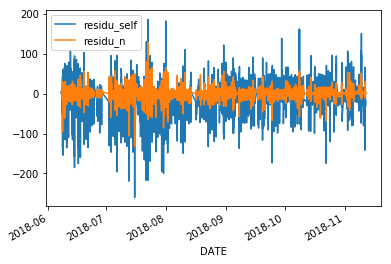

In [25]:
h[["residu_self","residu_n"]].plot()

Text(0.5,1,'June')

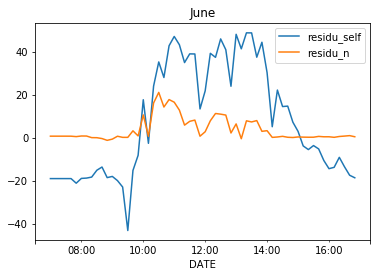

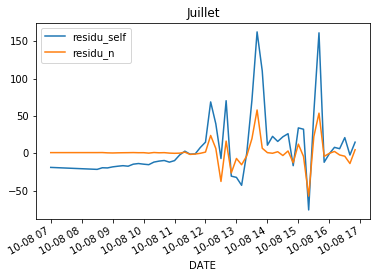

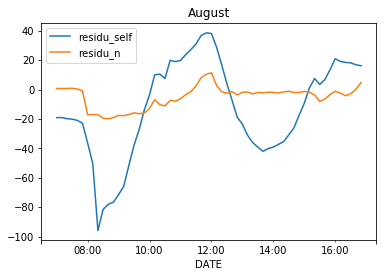

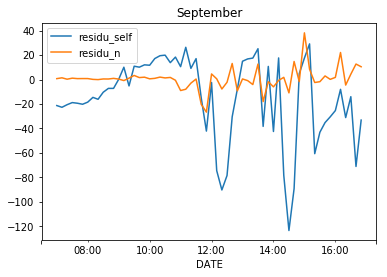

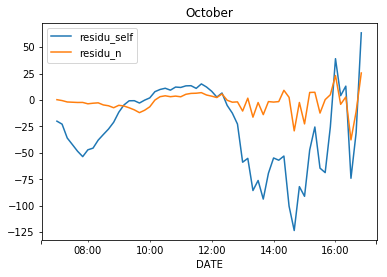

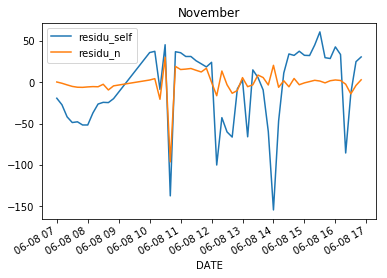

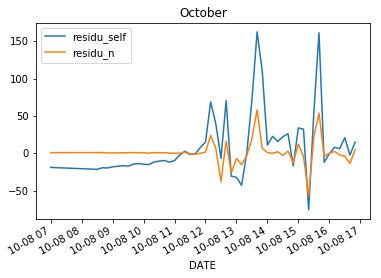

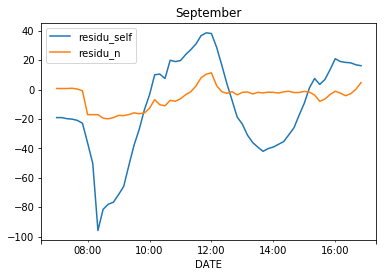

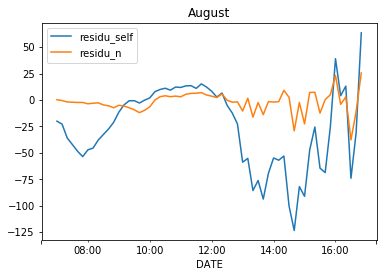

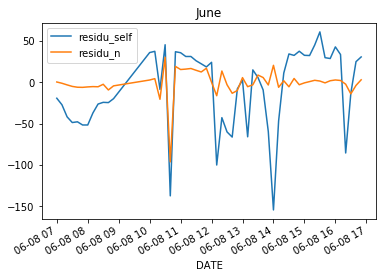

In [42]:
months=['June','Juillet','August','September','October','November']
date=["2018-11-08","2018-10-08","2018-09-08","2018-08-08","2018-07-08","2018-06-08"]
for i in range(len(months)):
    m=months[i]
    d=date[i]
    h[d:d][["residu_self","residu_n"]].plot()
    plt.title(m)

In [35]:
h['residu_self'].values

array([  5.12327794, -19.2615397 , -27.16531823, ..., -16.52708278,
       -20.59081259, -26.81531823])

# Wavelet decomposition

The coefficients ouput of the dwt are :
    1. The overall trend (low frequency)
    2. The details (high frequency)

In [36]:
#On 2 months
test = h['residu_self'].values[:24*1]

In [37]:
#pywt.dwt2(list(h['residu_self'].values), 'bior1.3')
cA, cD = pywt.dwt(list(h['residu_self'].values), 'db1')
cA, cD = pywt.dwt(list(test), 'db1')

In [38]:
len(h)

8640

Compute the details level at which we will decompose the signal

In [40]:
w = pywt.Wavelet('db1')
test = h['residu_self'].values[0:24*6*2]
level_d = pywt.dwt_max_level(len(test), w)

Decomposition 

### Number of level of the wavelet decomposition

In [ ]:
#Choice of the wavelet : daube
w = pywt.Wavelet('db1')

In [74]:
#coeffs = wavedec((test), 'db1', level=level_d)
level_d = pywt.dwt_max_level(len(h[d:d][["residu_self"]]), w)
level_d

5

### Different levels of the decomposition

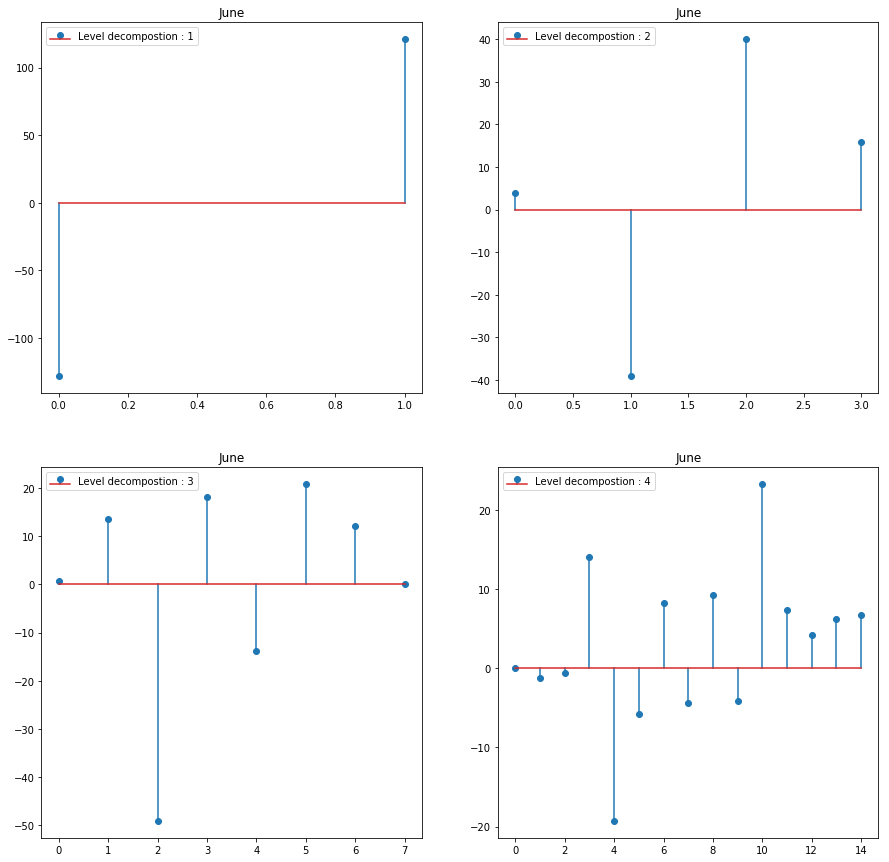

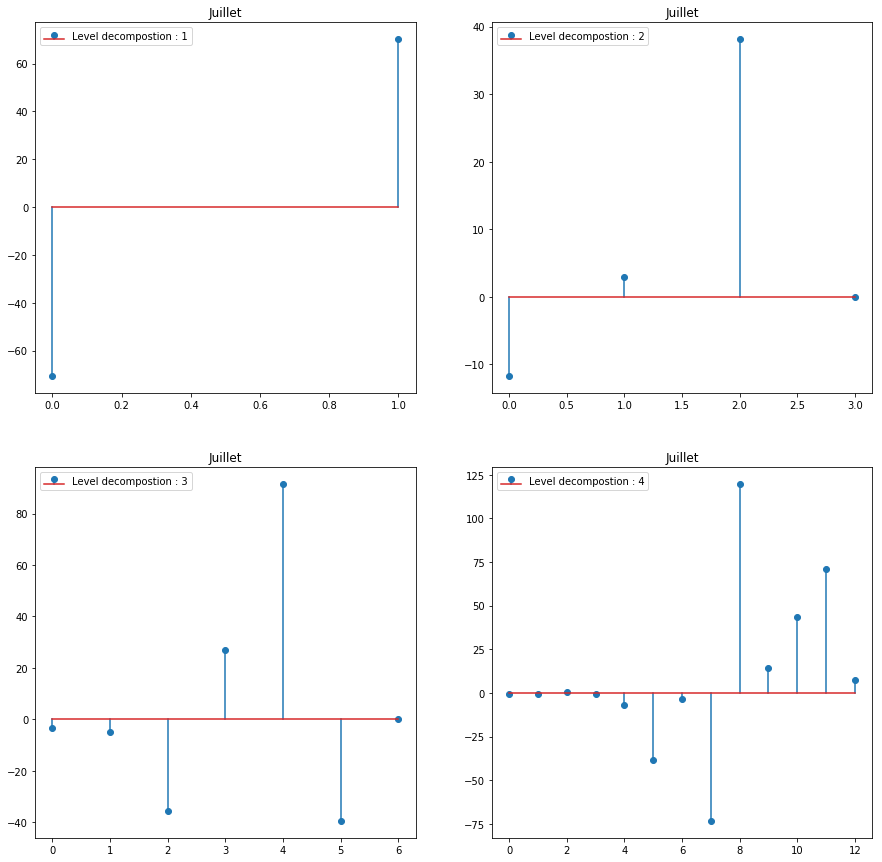

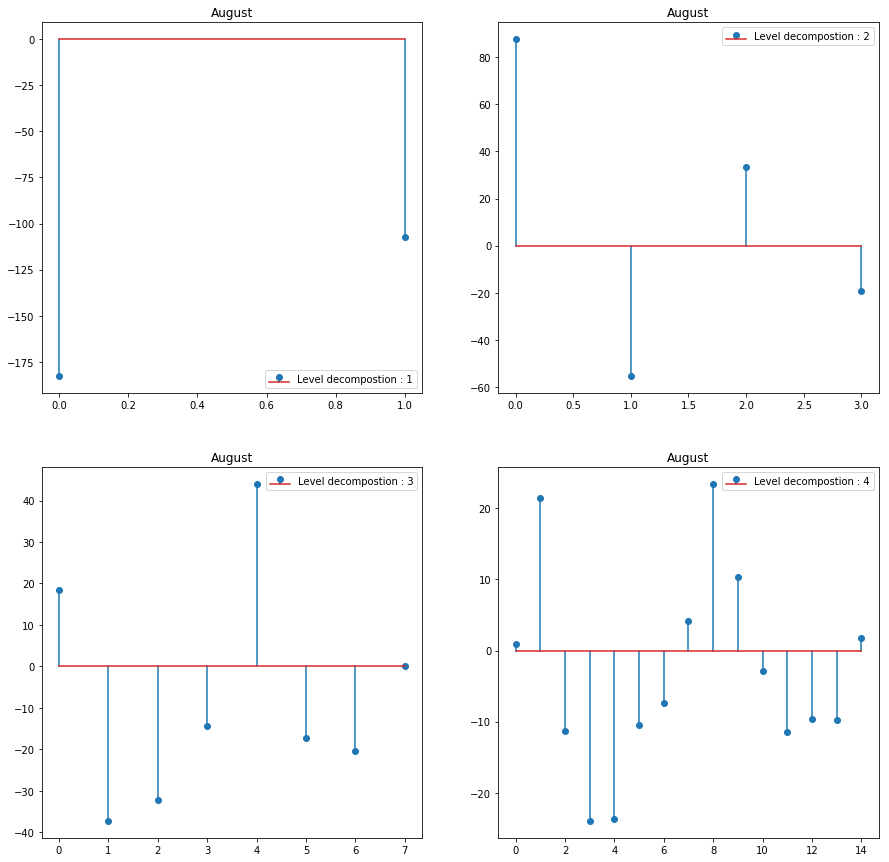

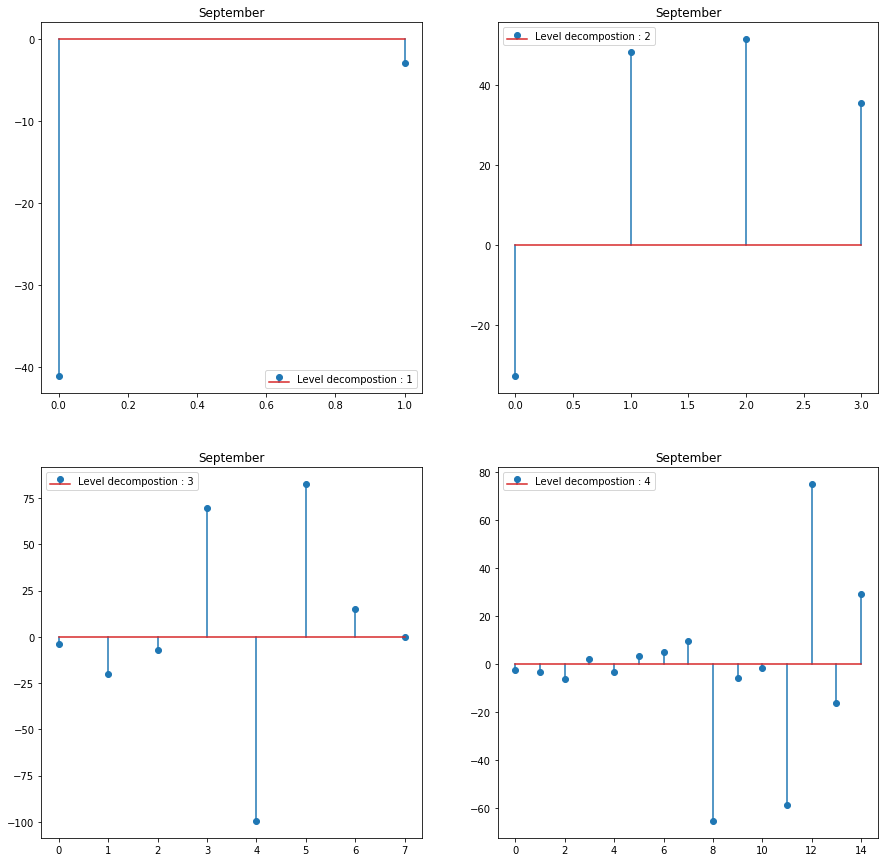

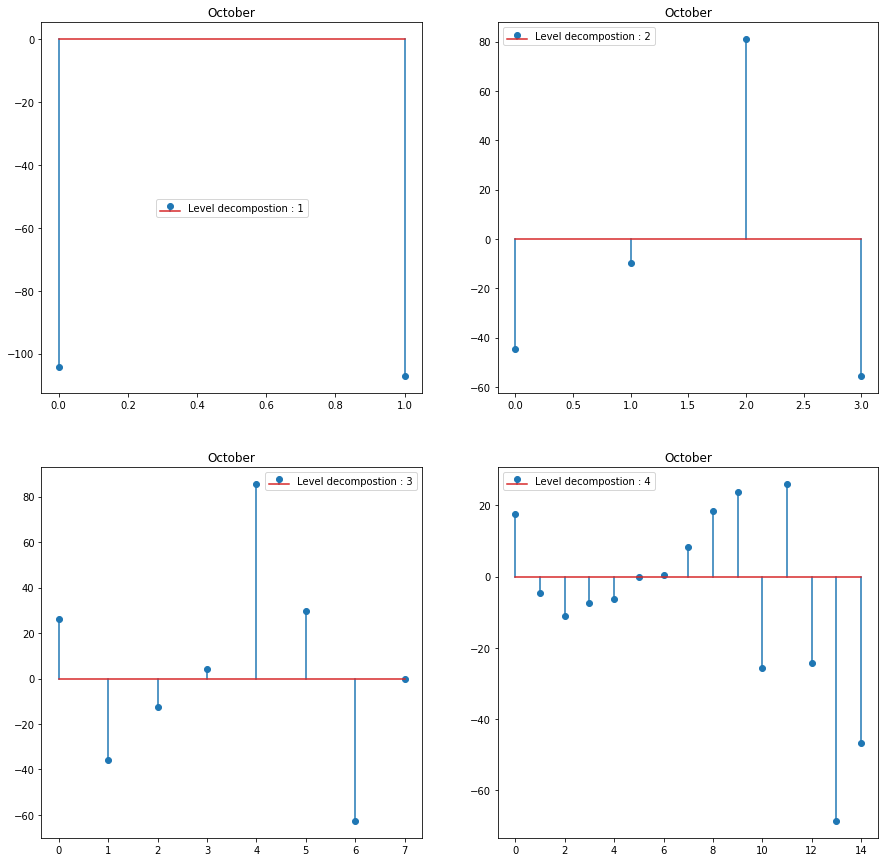

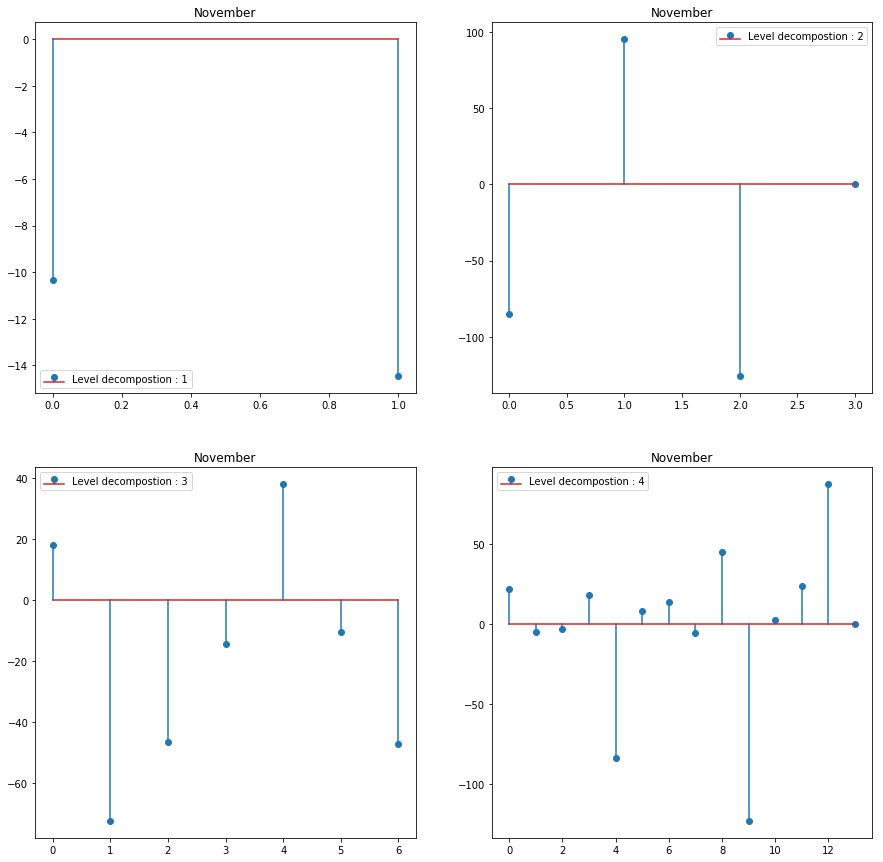

In [93]:
months=['June','Juillet','August','September','October','November']
date=["2018-11-08","2018-10-08","2018-09-08","2018-08-08","2018-07-08","2018-06-08"]
for i in range(len(months)):
    m=months[i]
    d=date[i]
    coeffs = wavedec(list(h[d:d]["residu_self"]), 'db1', level=level_d)
    fig = plt.figure(figsize=(15,15))
   
    for k in range(1,level_d):
        plt.subplot(int(level_d/2),int(level_d)-(level_d/2),k)
        plt.title(m)
        plt.stem(coeffs[k],label="Level decompostion : " + str(k))
        plt.legend()
        
    

# Moving average over one day on the full data

In [49]:
h = b.loc[:,'PVT02.INV02']
h.head()
irrpd = pd.to_numeric(h.loc[:,'IRRADIANCE'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
sol_avg = irrpd.rolling(window , win_type='triang').sum()


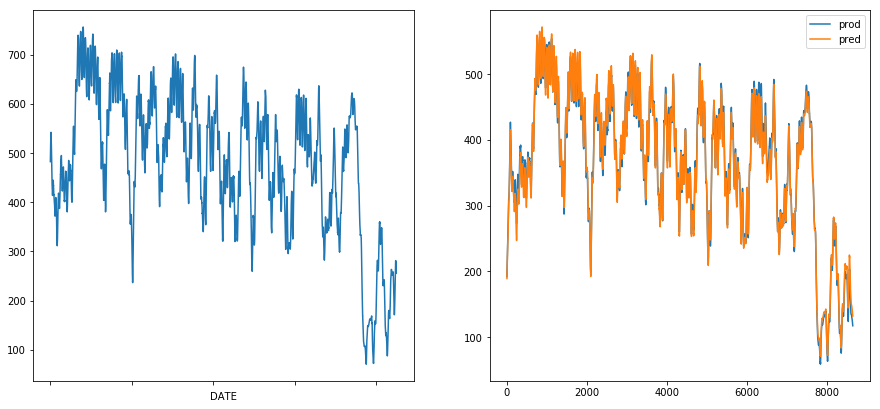

In [54]:
plt.figure(figsize=(15,15))
h = b.loc[:,'PVT03.INV02']
plt.subplot(221)
sol_avg[6*24:].plot()

plt.subplot(222)
pr = pd.to_numeric(h.loc[:,'Prod'])
pr = h.loc[:,'Prod']
window_size = 24*6
window = np.ones(window_size)/float(window_size)
prod = np.convolve(pr.values, window, 'same')
plt.plot(prod,label='prod')



prev = pd.to_numeric(h.loc[:,'Pred_self'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
pred = np.convolve(prev.values, window, 'same')
plt.plot(pred,label='pred')
plt.legend()

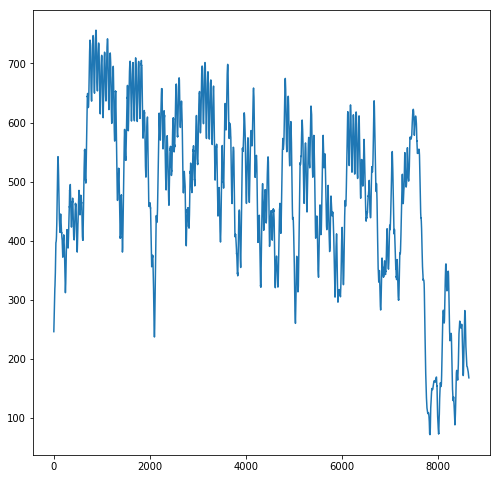

In [64]:
plt.figure(figsize=(18,18))
plt.subplot(221)
# A vérifier downsampling, upscaling
h = b.loc[:,'PVT02.INV02']
irrpd = pd.to_numeric(h.loc[:,'IRRADIANCE'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
solar_rad_avg = np.convolve(irrpd.values, window, 'same')
plt.plot(solar_rad_avg)



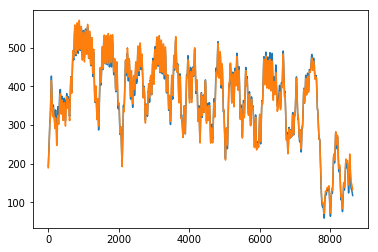

In [51]:
pr = pd.to_numeric(h.loc[:,'Prod'])
pr = h.loc[:,'Prod']
window_size = 24*6
window = np.ones(window_size)/float(window_size)
prod = np.convolve(pr.values, window, 'same')
plt.plot(prod)



prev = pd.to_numeric(h.loc[:,'Pred_self'])
window_size = 24*6
window = np.ones(window_size)/float(window_size)
pred = np.convolve(prev.values, window, 'same')
plt.plot(pred)

In [52]:
h = b.loc[:,'PVT02.INV02']
b.columns
len(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values)

test = pd.to_numeric(b.loc[:,'PVT02.INV02']['IRRADIANCE']).values[:1000]
pd.DataFrame(test).head()
h.head()

,Pred_neighbour,IRRADIANCE,Pred_self,Prod
DATE,,,,
2018-06-07 16:50:00,698.107903,919.0,696.201159,700.72
2018-06-08 07:00:00,29.054613,35.7,49.088144,28.53
2018-06-08 07:10:00,27.335125,41.6,53.410534,29.67
2018-06-08 07:20:00,35.372095,67.8,72.604874,41.21
2018-06-08 07:30:00,49.241247,91.7,90.114215,58.40


## Test visualisation over few month 

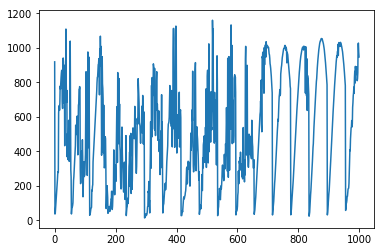

In [67]:
plt.plot(test)

## Convolution over a time period equal to a day

In [68]:
# Moving average
window_size = 24*6
window = np.ones(window_size)/float(window_size)
solar_rad_avg = np.convolve(test, window, 'same')

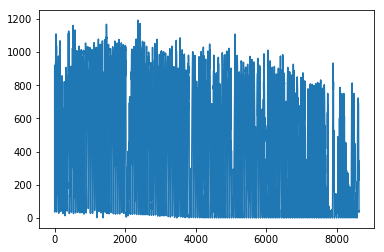

<Figure size 432x288 with 0 Axes>

In [69]:
plt.plot(list(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values))
plt.show()
plt.savefig("test.png")

In [70]:
len(b.loc[:,'PVT02.INV02']['IRRADIANCE'].values)

8640